# Introduccion a Tensor Flow

In [49]:
import tensorflow as tf
import numpy as np

In [4]:
# un tensor es como un array

In [5]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [6]:
res = tf.multiply(x1,x2)
res
print(res)


# tensor flow trabaja con place holder, objetos que durante la sesion se guardan como tales
# prodiamoos pensar que tensorflow no nos da el resutlado que queremos

Tensor("Mul:0", shape=(5,), dtype=int32)


In [7]:
# Debemos crear una sesion interactiva para realizar operaciones tensoriales
sess = tf.Session()
print(sess.run(res))

# Debemos siempre cerrar la sesion
sess.close()

[ 6 14 24 36 50]


In [8]:
# en lugar de crear el objeto sesion pdemos utilizar la sentencia with
# una vez termine de ejecutarse el with se elimina el objeto
with tf.Session() as sess:
    output = sess.run(res)
    print(output)
    
    

[ 6 14 24 36 50]


In [9]:
# Para poder utilizar  imagenes, usamos una configuracion especial
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las se;ales de trafico

In [31]:
import os
import skimage.data as imd
import imageio

In [44]:
def load_ml_data(data_directory):
    dirs = [
            # listamos todos los directorios que podemos obtener a partir de data_directory
            # tendremos todas las carpetas
            d for d in os.listdir(data_directory)
           
            
            if os.path.isdir(os.path.join(data_directory,d))]
    
    
    #print(dirs)
    # debemos crear 2 arrays, uno para las etiquetas y otra para las fotos
    labels = []
    images = []
    for d in dirs:
        # "empalmaremos el directorio actual con cada uno de los subdirectorios"
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        #print(label_dir)
        #print(file_names)
        # ahora recorremos las imagenes
        for f in file_names:
            # con esto extraemos las imagenes
            images.append(imageio.imread(f))
            # donde d es el nombre del directorio
            labels.append(int(d))
    return images, labels

In [45]:
# Estos son los directorios que nos retorna
main_dir ="../sample_project_1/curso_complementario/datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir= os.path.join(main_dir,"Testing")

In [46]:
images, labels = load_ml_data(train_data_dir)

In [47]:
len(images)

4575

In [48]:
type(images)

list

# Debemos transformarlos a array para poder trabajarlos mejor 

In [50]:
images = np.array(images)

C:\Users\calanche\Desktop\heart-disease-project\env\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [51]:
labels = np.array(labels)

In [52]:
type(images)

numpy.ndarray

In [53]:
images.ndim

1

In [54]:
images.size

4575

In [56]:
# imagen en pixeles en formato array de arrays (rojo, verde. azul), imaginar 
# que una foto es la suma de 3 fotos,  una roja una verde y una azul superpuestas
images[0]

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [57]:
# recordar que los array son como vectores colunmas
labels.ndim

1

In [58]:
labels.size

4575

In [59]:
# si quiero saber cuantas categorias de imagenes diferentes hay, puedo utilizar un conjunto
len(set(labels))

62

In [60]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [61]:
# tama;o de cada elemento en bytes, osea un numero se representa con 8 elementos
images.itemsize

8

In [62]:
images.nbytes

36600

In [63]:
# numero de imagenes totales 
images.nbytes / images.itemsize

4575.0

In [64]:
import matplotlib.pyplot as plt

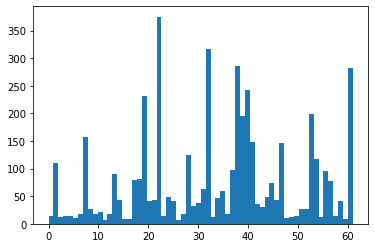

In [67]:
plt.hist(labels,len(set(labels)));

#### Podemos apreciar en el grafico de arriba que no todas las imagenes estan igual de representadas
#### debemos tener cuidado porque la red neuronal le dara mas importancia a esa caracteristica




In [69]:
import random

In [71]:
# hacemos una muestra random de las imagenes para verificar si la carga ha sido correcta
rand_signs = random.sample(range(0, len(labels)),6)

rand_signs

[3184, 3821, 4072, 584, 1481, 291]

forma (121, 110, 3), min:0, max:255
forma (152, 148, 3), min:14, max:255
forma (146, 148, 3), min:5, max:106
forma (218, 238, 3), min:0, max:255
forma (310, 157, 3), min:12, max:255
forma (129, 133, 3), min:3, max:255


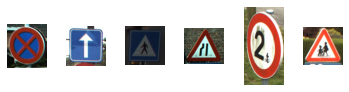

In [76]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    # para que no quedden las imagenes pegadas
    plt.subplots_adjust(wspace = 0.5)
    print(f"forma {temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")
    
plt.show()
# me dara el alto, el ancho, y el numero de canales(en este caso seran 3, por que es RGB)
# 0 es negro, 255 es blanco

#### Apreciamos que no todos los elementos son del mismo tama;o y esto sera importante 
#### al momento de entrenar la red neuronal


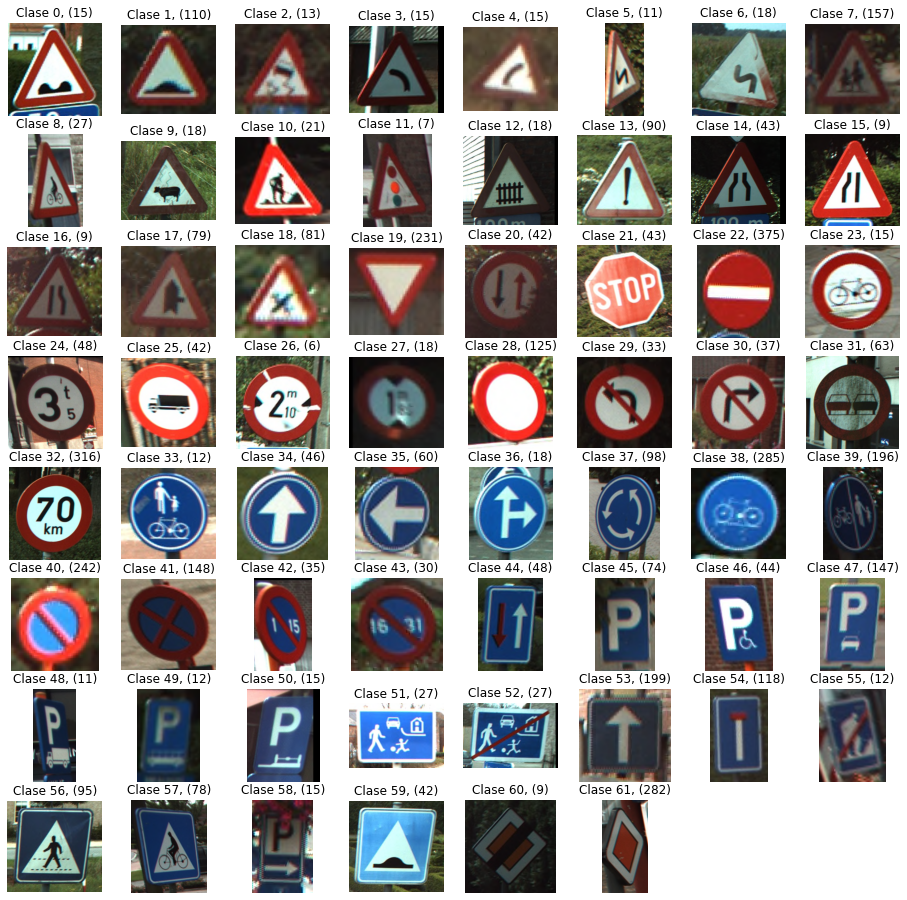

In [80]:
# definimos un conjunto unico, impreremos una imagen de cada tipo
unique_labels = set(labels)
plt.figure(figsize= (16,16))
i = 1
for label in unique_labels:
    # labels.index me devuelve la posicion que ocupa la etiqueta
    # con esa posicion consulto la imagen de la cual procede
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title(f"Clase {label}, ({list(labels).count(label)})")
    i +=1
    plt.imshow(temp_im)
    
plt.show()

# Modelo de Red Neuronal con TensorFLow
* las imagenes no todas son del mismo  tama;o
* Hay 62 clases de imagenes(desde la 0 hasta la 61)
* La distribucion de se;ales de trafico no es uniforme( algunas salen mas veces que otras)


In [81]:
# PREPROCESADO DE DATOS
# En la mayoria de los casos el color no juega un papel principal, escalaremos n las imagagenes
# a una escala de grises
# quitamos los colores y re-escalamos las imagenes para que  esten del mismo tama;o

from skimage import transform

In [83]:
# conseguimos el tama;o minimo de las imagenes
w = 99999
h = 99999
for image in images:
    if image.shape[0] < h:
        
        h = image.shape[0]
    
    if image.shape[1] < w:
        
        w = image.shape[1]
        
print(f"tama;o minimo:{h}x{w}")
        
        
        

tama;o minimo:22x20


In [85]:
# Transformamos todas las imagines a un nuevo formato
images30 = [transform.resize(image, (30,30)) for image in images]

In [86]:
images30[0]

array([[[0.72005229, 0.70687582, 0.57784314],
        [0.52505882, 0.40976471, 0.28803922],
        [0.52320261, 0.39620915, 0.28581699],
        ...,
        [0.19869281, 0.22895425, 0.15163399],
        [0.18466667, 0.21152941, 0.14058824],
        [0.18534641, 0.21228758, 0.14169935]],

       [[0.69623529, 0.65879739, 0.53219608],
        [0.49666667, 0.34654902, 0.23752941],
        [0.46705882, 0.32098039, 0.22104575],
        ...,
        [0.18607843, 0.22137255, 0.14294118],
        [0.18980392, 0.22901961, 0.1545098 ],
        [0.19847059, 0.22721569, 0.15901961]],

       [[0.68928105, 0.67254902, 0.53823529],
        [0.50666667, 0.43901961, 0.32901961],
        [0.47941176, 0.40849673, 0.30392157],
        ...,
        [0.18496732, 0.20588235, 0.13333333],
        [0.18823529, 0.22019608, 0.14627451],
        [0.19267974, 0.22366013, 0.15601307]],

       ...,

       [[0.0903268 , 0.12071895, 0.04843137],
        [0.07627451, 0.11058824, 0.0672549 ],
        [0.14052288, 0

forma (30, 30, 3), min:0.07058823529411765, max:0.924705882352941
forma (30, 30, 3), min:0.15098039215686268, max:0.996078431372549
forma (30, 30, 3), min:0.029803921568628274, max:0.9876601307189536
forma (30, 30, 3), min:0.09071895424836601, max:0.9989346405228757
forma (30, 30, 3), min:0.050980392156862744, max:0.996078431372549
forma (30, 30, 3), min:0.08529411764705865, max:0.8296764705882355


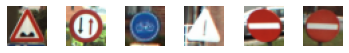

In [87]:
# hacemos una muestra random de las imagenes para verificar si la carga ha sido correcta
rand_signs = random.sample(range(0, len(labels)),6)

rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    # para que no quedden las imagenes pegadas
    plt.subplots_adjust(wspace = 0.5)
    print(f"forma {temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")
    
plt.show()

## Escala de grises

In [88]:
from skimage.color import rgb2gray

In [89]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

forma (30, 30), min:0.07794475163398693, max:0.9368630522875814
forma (30, 30), min:0.07031473202614379, max:0.8956281045751635
forma (30, 30), min:0.10418819869281029, max:0.5653520522875817
forma (30, 30), min:0.014345392156862704, max:0.6942906274509811
forma (30, 30), min:0.15947058823529403, max:0.9989568382352941
forma (30, 30), min:0.0, max:0.996078431372549


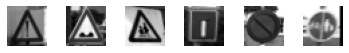

In [91]:
# hacemos una muestra random de las imagenes para verificar si la carga ha sido correcta
rand_signs = random.sample(range(0, len(labels)),6)

rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap='gray')
    # para que no quedden las imagenes pegadas
    plt.subplots_adjust(wspace = 0.5)
    print(f"forma {temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")
    
plt.show()

# Creacion del modelo de red Neuronal con Tensorflow

In [93]:
# Un objeto de tipo grafo guarda las operaciones para la red neuronal que quiero ejecutar, pero no los valores en si

# Definicion de placeholder, para las entradas y las etiquetas, no trabajamos con datos reales sino con valores no asignados
# Estos valores seran inializados dentro de la sesion cuando la ejecutemos

# los placesholder tomaran los valores finales despues de hacer el run, son como variables
#   debemos asignar el tipo de dato, y el tama;o pasando el valor por defecto y el tama;o
x = tf.placeholder(dtype = tf.float32, shape = [None,30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# contruccion de la red neuronal, recordar que que cuando pasamos a una escala de grises solo hay un canal de informacion

# flat, es aplanar volver una matriz, un array
images_flat = tf.contrib.layers.flatten(x)

# Se construye la capa  de conexion para generar operaciones de clasificacion
# Usaremos la red neuronal para hacer una clasificacion logistica, en este caso con 62 salidas

# conectamos la variables de entrada y especificamos el numero de salidas
## nn = neural network, los logits son las funciones que operaran con todos y cada uno de los valores
# antes de convertirse en valor de salida, de las capas anteriores internas de la red neuronal
# utiliza una escala relativa para intentar entender las unidades como lineales
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# el perceptron multicapa que se construye es definido por una funcion de perdidas, esta funcion depende de la tarea que deseamos llevar a cabo

# funcion de perdida o coste
# la funcion de perdida en este caso calcula la entropia de cruse entre los logits y las etiquetas
# mide la probabilidad de error, de forma que en una clasficacion discreta con una clase de salida
# mutuamente exclusivas ya que no se pueden clasificar un objeto como 2 a la vez
# es la tecnica perfecta para la clasificacion
# reduce_mean, calcula el promedio de los elementos a travez de las dimensiones del tensor
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))


# Definimos una funcion para optimizar
# entre los populares esta el metodo de gradiente descente, y el de Adam y el rmsprop
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# convierto lo logits  a etiquetas para poder clasificar
final_pred = tf.argmax(logits, 1)
# para ajustar la eficacia del modelo, definimos

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))







The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [94]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [95]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [96]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [97]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

 Luego de haber construido el modelo capa por capa, viene el momento... de entrenamiento

# Entrenamiento del modelo
Ahora ejecutaremos nuestro modelo de red neuronal con la ayuda de una sesion de tensor flow a la que le pasaremos el grafo de operaciones definido antes de ejecutarlo todo, Debido a la aleotoridad del proceso
lo mas normal es dejar una "semilla" para la reproducibilidad

In [135]:
tf.set_random_seed(1234)

# bucles de entrenamiento, definimos el numero de pasadas para que la red neuronal aprenda
# en cada vez vamos a intentar aproximar el factor de perdida e intentaremos que acabe estabilizandose

# dentro del bucle se ejecutara la sesion con el optimizador de la red neuronal
# y en este caso la metrica de perdida o eficacia definidas, seran los que decidan cuando estara preparada la rea neuronal
# tambien hay un argumento llamado feed_dict, que suministra datos al modelo, de modo que cada epoch(iteraciones)
# podemos imprimir resultados para ver si el modelo va bien, chequeamos las perdidas, si el coste de computacion esta tardando demasiado y demas
# conviene no imprimr siempre, porque se puede saturar el sistema

sess = tf.Session()

sess.run(tf.global_variables_initializer())


# el 1 es para que tome el ultimo elemento
for i in range(601):
   
    # podriamos utilizar la funcion de perdias "loss" para medir

    _, accuracy_val = sess.run([train_opt, accuracy],
                               feed_dict={
                                   
                                   x: images30,
                                   y: list(labels)
                               })
    
#     _, loss_val = sess.run([train_opt, loss],
#                                feed_dict={
                                   
#                                    x: images30,
#                                    y: list(labels)
#                                })
    # cada multiplo de 50
    if i%50 == 0:
        print("EPOCH", i)
        
        print(" eficacioa :", accuracy_val)
        #print("perdidas/loss", loss_val)
    
    #print("Fin del Epoch", i)
        
    
    




EPOCH 0
 eficacioa : 42.866665
EPOCH 50
 eficacioa : 34.62164
EPOCH 100
 eficacioa : 35.039345
EPOCH 150
 eficacioa : 34.82754
EPOCH 200
 eficacioa : 34.77661
EPOCH 250
 eficacioa : 34.74142
EPOCH 300
 eficacioa : 34.58754
EPOCH 350
 eficacioa : 34.508854
EPOCH 400
 eficacioa : 34.470383
EPOCH 450
 eficacioa : 34.416832
EPOCH 500
 eficacioa : 34.383606
EPOCH 550
 eficacioa : 34.346447
EPOCH 600
 eficacioa : 34.321968


# Evaluacion del modelo

In [136]:
# tomaremos un numero aleatorio de imagenes e intentaremos comparar las etiquetas de la prediccion
# con las etiquetas reales, escogeremos 16 fotos aleateorias
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]



In [117]:
sample_labels

[38,
 61,
 7,
 40,
 4,
 45,
 8,
 41,
 41,
 14,
 7,
 30,
 31,
 32,
 28,
 7,
 35,
 56,
 39,
 19,
 22,
 34,
 45,
 40,
 16,
 25,
 38,
 32,
 34,
 19,
 22,
 37,
 22,
 61,
 19,
 61,
 22,
 22,
 32,
 11]

In [137]:
prediction = sess.run([final_pred],feed_dict = {
    x: sample_images
    
})[0]

In [138]:
prediction

array([22, 53, 61, 39, 40, 38, 28, 22, 45, 40, 19, 41, 39, 57, 47, 61, 61,
       32, 18, 32,  1, 40, 22, 53, 32, 53, 28, 41, 32, 32, 53,  7, 39, 39,
       41, 13,  1, 28, 22, 38], dtype=int64)

In [139]:
sample_labels

[22,
 53,
 61,
 39,
 40,
 38,
 28,
 22,
 45,
 41,
 19,
 22,
 39,
 57,
 47,
 37,
 25,
 32,
 18,
 32,
 1,
 31,
 22,
 54,
 32,
 53,
 28,
 41,
 32,
 32,
 53,
 17,
 39,
 39,
 41,
 10,
 1,
 28,
 22,
 38]

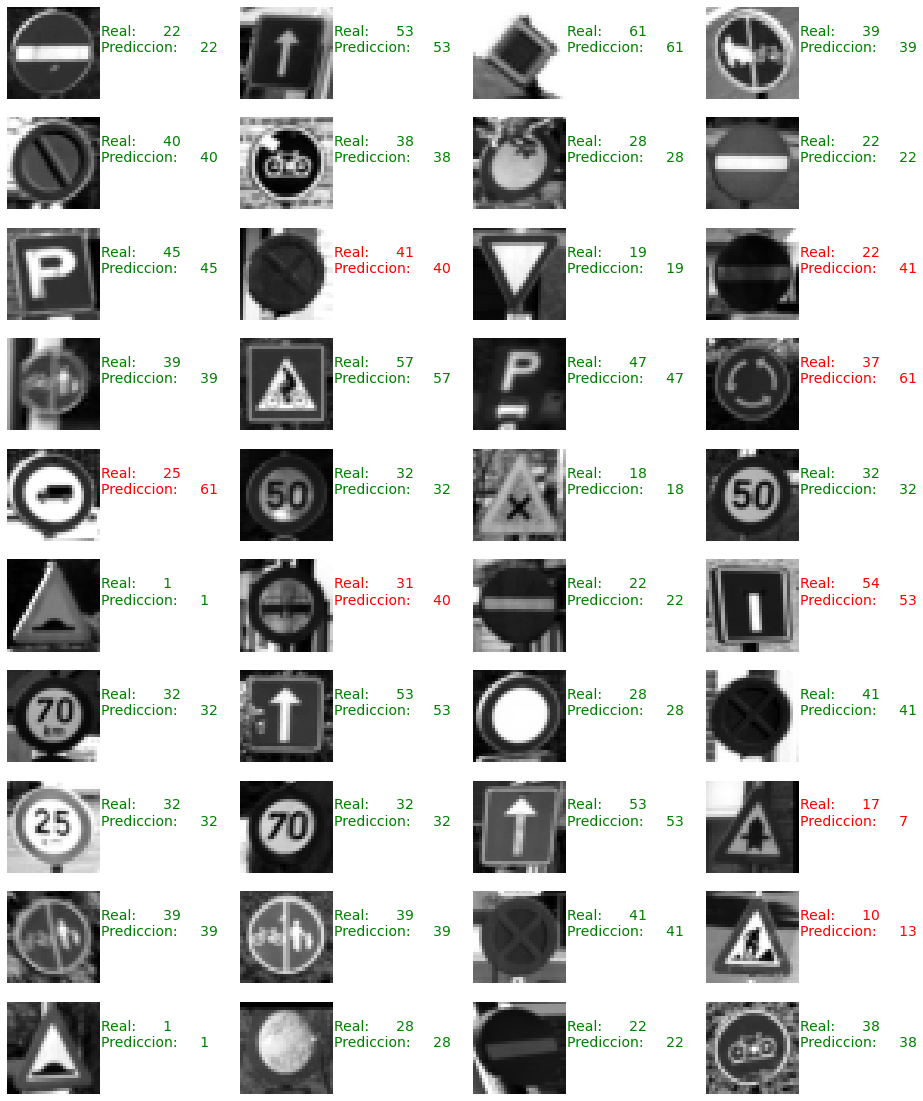

In [140]:
plt.figure(figsize=(16, 20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10, 4, i+1)
    plt.axis("off")
    # en caso de que la prediccion sea correcta verde, sino rojo
    color = "green" if truth == predi else "red"
    plt.text(30,14, f"Real:      {truth}\nPrediccion:     {predi}",
             fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()
    

In [125]:
test_images, test_labels = load_ml_data(test_data_dir)

In [126]:
test_images30 =[transform.resize(im,(30,30)) for im in test_images]

In [127]:
len(test_images30)

2520

In [128]:
test_images30 = rgb2gray(np.array(test_images30))

In [141]:
# recordar que final_pred es el algoritmo que le vamos a aplicar
prediction = sess.run([final_pred], feed_dict ={
    x:test_images30
})[0]

In [142]:
match_count = sum([int(y == y_p) for y, y_p in zip(test_labels, prediction)])
match_count

1537

In [143]:
acc = match_count/len(test_labels)*100
print(f"La eficacia de la red neuronal es de: {acc:.3f}")

La eficacia de la red neuronal es de: 60.992
